In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.cm as cm
import numpy.polynomial.polynomial as poly


import math
import pandas as pd
from pandas import DataFrame, read_csv
import pylab as pl
import time

In [3]:

theta12 = 33.48*(np.pi/180) ; theta12up = 35.9*(np.pi/180) ; theta12dn = 31.3*(np.pi/180)
theta13 = 8.52*(np.pi/180)  ; theta13up = 9.11*(np.pi/180) ; theta13dn = 7.87*(np.pi/180)
theta23 = 42.2*(np.pi/180)  ; theta23up = 38.4*(np.pi/180) ; theta23dn = 53.3*(np.pi/180)
C12  = np.cos(theta12)**2 ; C12up  = np.cos(theta12up)**2 ; C12dn  = np.cos(theta12dn)**2
C13  = np.cos(theta13)**2 ; C13up  = np.cos(theta13up)**2 ; C13dn  = np.cos(theta13dn)**2
S12  = np.sin(theta12)**2 ; S12up  = np.sin(theta12up)**2 ; S12dn  = np.sin(theta12dn)**2
S13  = np.sin(theta13)**2 ; S13up  = np.sin(theta13up)**2 ; S13dn  = np.sin(theta13dn)**2
S23  = np.sin(theta23)**2 ; S23up  = np.sin(theta23up)**2 ; S23dn  = np.sin(theta23dn)**2
C23  = np.cos(theta23)**2 ; C23up  = np.cos(theta23up)**2 ; C23dn  = np.cos(theta23dn)**2

Dm21 = 7.5e-5   ; Dm21up = 8.09e-5  ; Dm21dn = 7.03e-5
Dm31 = 2.458e-3 ; Dm31up = 2.599e-3 ; Dm31dn = 2.325e-3
Dm32 = 2.488e-3 ; Dm32up = 2.59e-3  ; Dm32dn = 2.307e-3

In [4]:
# mass beta beta limit
def MbetabetaNorm(ml,alpha,beta):
    return ((C12*C13*ml+C13*S12*(ml**2+Dm21)**(1/2)*np.cos(alpha*2)+S13*(ml**2+Dm31)**(1/2)*np.cos(2*beta))**2+ \
(C12*S13*(ml**2+Dm21)**(1/2)*np.sin(2*alpha)+S13*(ml**2+Dm31)**(1/2)*np.sin(2*beta))**2)**(1/2)
def MbetabetaNormup(ml,alpha,beta):
    return ((C12up*C13up*ml+C13up*S12up*(ml**2+Dm21up)**(1/2)*np.cos(alpha*2)+S13up*(ml**2+Dm31up)**(1/2)*np.cos(2*beta))**2+ \
(C12up*S13up*(ml**2+Dm21up)**(1/2)*np.sin(2*alpha)+S13up*(ml**2+Dm31up)**(1/2)*np.sin(2*beta))**2)**(1/2)
def MbetabetaNormdn(ml,alpha,beta):
    return ((C12dn*C13dn*ml+C13dn*S12dn*(ml**2+Dm21dn)**(1/2)*np.cos(alpha*2)+S13dn*(ml**2+Dm31dn)**(1/2)*np.cos(2*beta))**2+ \
(C12dn*S13dn*(ml**2+Dm21dn)**(1/2)*np.sin(2*alpha)+S13dn*(ml**2+Dm31dn)**(1/2)*np.sin(2*beta))**2)**(1/2)


def MbetabetaInv(ml,alpha,beta):
    return ((C12*C13*(ml**2+Dm31)**0.5+C13*S12*(ml**2+Dm31)**0.5*np.cos(2*alpha)+S13*ml*np.cos(2*beta))**2+ \
            (C13*S12*(ml**2+Dm31)*np.sin(2*alpha)+S13**2*ml*np.sin(2*beta))**2)**0.5
def MbetabetaInvup(ml,alpha,beta):
    return ((C12up*C13up*(ml**2+Dm31up)**0.5+C13up*S12up*(ml**2+Dm31up)**0.5*np.cos(2*alpha)+S13up*ml*np.cos(2*beta))**2+ \
            (C13up*S12up*(ml**2+Dm31up)*np.sin(2*alpha)+S13up**2*ml*np.sin(2*beta))**2)**0.5
def MbetabetaInvdn(ml,alpha,beta):
    return ((C12dn*C13dn*(ml**2+Dm31dn)**0.5+C13dn*S12dn*(ml**2+Dm31dn)**0.5*np.cos(2*alpha)+S13dn*ml*np.cos(2*beta))**2+ \
            (C13dn*S12dn*(ml**2+Dm31dn)*np.sin(2*alpha)+S13dn**2*ml*np.sin(2*beta))**2)**0.5


# mass nu e normal functions
def MnueNorm(ml):
    return (ml**2+C13*S12*Dm21+S13*Dm31)**(1/2)
def MnueNormdn(ml):
    return (ml**2+C13dn*S12dn*Dm21dn+S13dn*Dm31dn)**(1/2)
def MnueNormup(ml):
    return (ml**2+C13up*S12up*Dm21up+S13up*Dm31up)**(1/2)
def MnueInv(ml):
    return (ml**2+C13*S12*Dm31+C13*S13*Dm32)**(1/2)
def MnueInvdn(ml):
    return (ml**2+C13dn*S12dn*Dm31dn+C13dn*S13dn*Dm32dn)**(1/2)
def MnueInvup(ml):
    return (ml**2+C13up*S12up*Dm31up+C13up*S13up*Dm32up)**(1/2)
#

In [58]:
t1=time.time()
#vals = np.arange(0,1,1e-5)
vals = np.logspace(-4,0,num=1000)
t2=time.time()
t2-t1

0.00024199485778808594

100000

In [19]:
aa = np.linspace(0, 2*3.14, num=5)

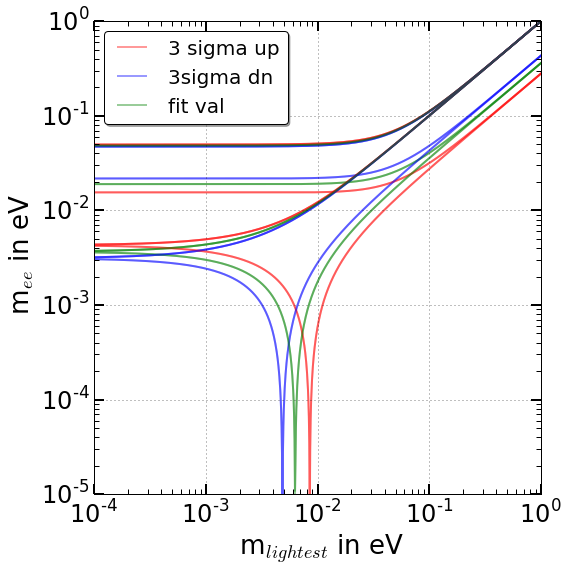

In [52]:
plt.figure(figsize=(8,8))
My_labels = ['3 sigma up','3sigma dn','fit val']

for x in range(0,len(aa)):
    plt.loglog(vals,MbetabetaInvup(vals,aa[x],aa[x]),color='r',linewidth=2,alpha=0.4,label=My_labels[0])
    plt.loglog(vals,MbetabetaInvdn(vals,aa[x],aa[x]),color='b',linewidth=2,alpha=0.4,label=My_labels[1])
    plt.loglog(vals,MbetabetaInv(vals,aa[x],aa[x]),color='g',linewidth=2,alpha=0.4,label=My_labels[2])
    My_labels[0]= "_nolegend_"
    My_labels[1]= "_nolegend_"
    My_labels[2]= "_nolegend_"
    plt.loglog(vals,MbetabetaNormup(vals,aa[x],aa[x]),color='r',linewidth=2,alpha=0.4)
    plt.loglog(vals,MbetabetaNormdn(vals,aa[x],aa[x]),color='b',linewidth=2,alpha=0.4)
    plt.loglog(vals,MbetabetaNorm(vals,aa[x],aa[x]),color='g',linewidth=2,alpha=0.4)

#plt.fill_between(vals, MnueNormdn(vals), MnueNormup(vals),color='r')
#plt.fill_between(vals, MnueInvdn(vals), MnueInvup(vals),color='b')

#plt.xlim(1e-5,1)

plt.legend(loc='upper left',fontsize=20,shadow=True, fancybox=True)
#plt.text(1.2e-3, 1.3e-1, r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$', fontsize=26)
plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{ee}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-5,1)
plt.xlim(1e-4,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

In [8]:
bb = np.linspace(0, 2*3.14, num=50)

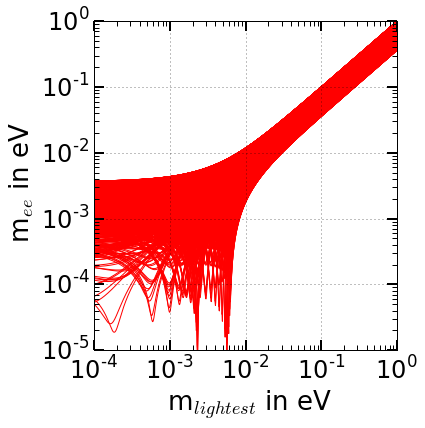

16.90495204925537

In [56]:
plt.figure(figsize=(8,8))
t1=time.time()

for x in range(0,len(bb)):
    for y in range(0,len(bb)):   
        plt.loglog(vals,MbetabetaNorm(vals,bb[x],bb[y]),color='r',linewidth=1)
    #plt.loglog(vals,MbetabetaInvdn(vals,aa[x],aa[x]),color='b',linewidth=2)
    #plt.loglog(vals,MbetabetaInv(vals,aa[x],aa[x]),color='g',linewidth=2)

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{ee}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-5,1)
plt.xlim(1e-4,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()
t2=time.time()
t2-t1

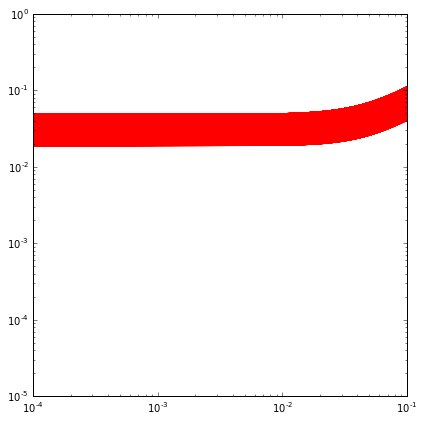

In [21]:
plt.figure(figsize=(6,6))

for x in range(0,len(bb)):
    for y in range(0,len(bb)):
        
        plt.loglog(vals,MbetabetaInv(vals,bb[x],bb[y]),color='r',linewidth=1)
    #plt.loglog(vals,MbetabetaInvdn(vals,aa[x],aa[x]),color='b',linewidth=2)
    #plt.loglog(vals,MbetabetaInv(vals,aa[x],aa[x]),color='g',linewidth=2)

#plt.fill_between(vals, MnueNormdn(vals), MnueNormup(vals),color='r')
#plt.fill_between(vals, MnueInvdn(vals), MnueInvup(vals),color='b')

plt.xlim(1e-4,1e-1)
plt.ylim(1e-5,1)
plt.tight_layout()
plt.show()

In [46]:
vals2

array([  1.00000000e-04,   1.00092155e-04,   1.00184395e-04, ...,
         9.98159444e-01,   9.99079298e-01,   1.00000000e+00])

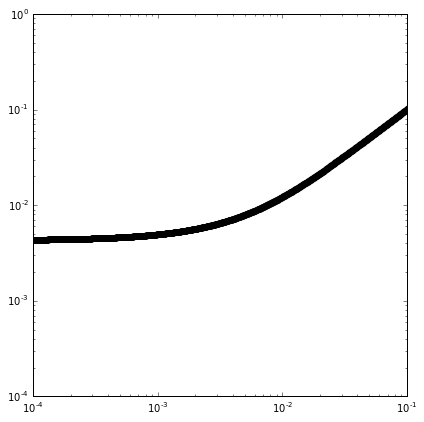

In [49]:
plt.figure(figsize=(6,6))
vals2 = np.logspace(-4,0,num=1000)

plt.scatter(vals2,MbetabetaNormup(vals2,np.pi,np.pi),color='k',linewidth=2)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4,1)
plt.xlim(1e-4,1e-1)
plt.tight_layout()
plt.show()

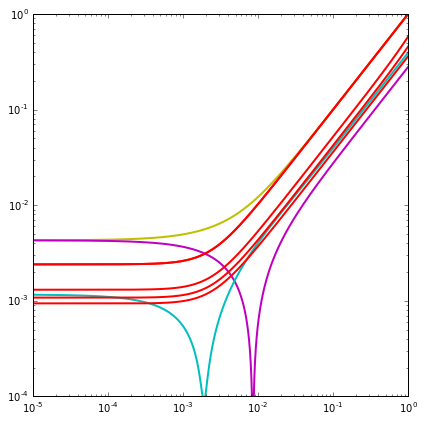

In [27]:
plt.figure(figsize=(6,6))
#plt.loglog(vals,MnueNorm(vals),color='r',linewidth=2)
#plt.loglog(vals,MnueInv(vals),color='b',linewidth=2)

#normal heirarcy
plt.loglog(vals,MbetabetaNormup(vals,np.pi,np.pi),color='y',linewidth=2)
plt.loglog(vals,MbetabetaNormup(vals,np.pi/2,np.pi/2),color='m',linewidth=2)
plt.loglog(vals,MbetabetaNormup(vals,2*np.pi/5,np.pi),color='c',linewidth=2)

#plt.loglog(vals,MbetabetaNorm(vals,np.pi,np.pi),color='r',linewidth=2)
#plt.loglog(vals,MbetabetaNorm(vals,np.pi/2,np.pi/2),color='r',linewidth=2)
#plt.loglog(vals,MbetabetaNorm(vals,2*np.pi/5,np.pi),color='r',linewidth=2)

#plt.loglog(vals,MbetabetaNormdn(vals,np.pi,np.pi),color='k',linewidth=2)
#plt.loglog(vals,MbetabetaNormdn(vals,np.pi/2,np.pi/2),color='k',linewidth=2)
#plt.loglog(vals,MbetabetaNormdn(vals,2*np.pi/5,np.pi),color='k',linewidth=2)

plt.loglog(vals,MbetabetaInv(vals,np.pi,np.pi),color='r',linewidth=2)
plt.loglog(vals,MbetabetaInv(vals,3*np.pi/5,3*np.pi/5),color='r',linewidth=2)
plt.loglog(vals,MbetabetaInv(vals,np.pi/2,np.pi/2),color='r',linewidth=2)
plt.loglog(vals,MbetabetaInv(vals,4*np.pi/3,4*np.pi/3),color='r',linewidth=2)
plt.loglog(vals,MbetabetaInv(vals,0,0),color='r',linewidth=2)

#plt.fill_between(vals, MnueNormdn(vals), MnueNormup(vals),color='r')
#plt.fill_between(vals, MnueInvdn(vals), MnueInvup(vals),color='b')

#plt.xlim(1e-5,1)
plt.ylim(1e-4,1)
plt.tight_layout()
plt.show()

In [63]:
Mjvals = np.logspace(-4,-2,num=100)

In [65]:
Xvals = np.logspace(-4,-2,num=100)

In [123]:
t1=time.time()
pit = []
Mjvals = np.linspace(0, 2*3.14, num=500) # 1000 works takes a min,
LMj = len(Mjvals)
for x in range(0,LMj):
    for y in range(0,LMj):   
        q = min(MbetabetaNorm(Xvals,Mjvals[x],Mjvals[y]))
        if q<1e-3:
            pit.append((Mjvals[x],Mjvals[y]))
        

t2=time.time()
t2-t1

10.399383783340454

In [124]:
len(pit)

114800

In [125]:
LMj**2

250000

In [126]:
(len(pit)/LMj**2)*100

45.92

In [127]:
X1, Y1 = zip(*pit)

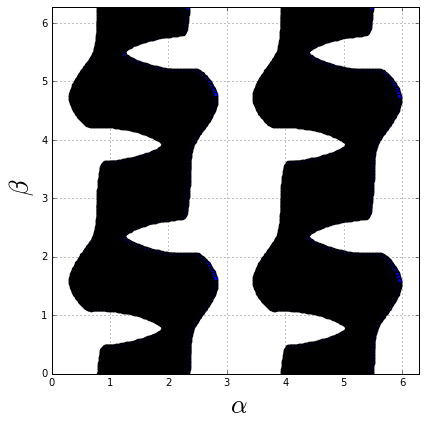

In [128]:
""" this is for values < 1e3 It converges at 45.9%"""
plt.figure(figsize=(6,6))
plt.scatter(X1,Y1)
 
plt.xlabel(r' $\alpha$',fontsize=26)
plt.ylabel(r' $\beta$',fontsize=26)
#plt.tick_params('both', length=10, width=2, which='major')
#plt.tick_params('both', length=5, width=1, which='minor')
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)

plt.ylim(0,2*3.14)
plt.xlim(0,2*3.14)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

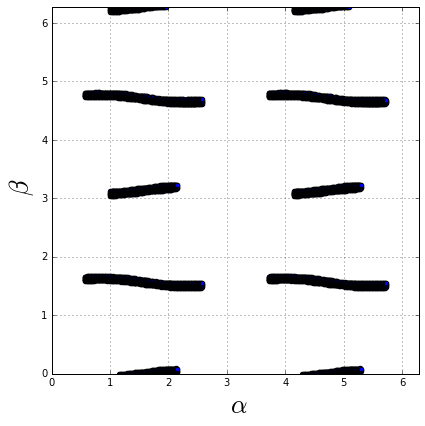

In [121]:
""" this is for values < 1e4  It converges at ~2.85%"""
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
 
plt.xlabel(r' $\alpha$',fontsize=26)
plt.ylabel(r' $\beta$',fontsize=26)
#plt.tick_params('both', length=10, width=2, which='major')
#plt.tick_params('both', length=5, width=1, which='minor')
#plt.xticks(fontsize=24)
#plt.yticks(fontsize=24)

plt.ylim(0,2*3.14)
plt.xlim(0,2*3.14)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

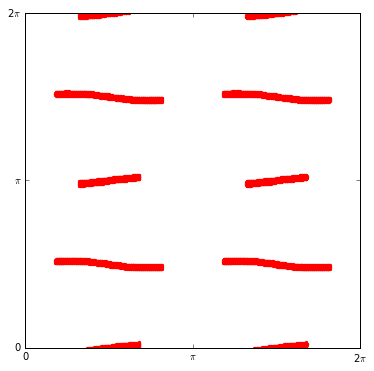

In [122]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y,color='r',marker='.')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])

ax.set_ylim((0, 2*np.pi))
ax.set_yticks([0, np.pi, 2*np.pi])
ax.set_yticklabels(['0', '$\pi$', '2$\pi$'])

plt.show()

In [9]:
theta12 = 33.48*(np.pi/180) ; theta12up = 35.9*(np.pi/180) ; theta12dn = 31.3*(np.pi/180)
theta13 = 8.52*(np.pi/180)  ; theta13up = 9.11*(np.pi/180) ; theta13dn = 7.87*(np.pi/180)
theta23 = 42.2*(np.pi/180)  ; theta23up = 38.4*(np.pi/180) ; theta23dn = 53.3*(np.pi/180)
C12  = np.cos(theta12)**2 ; C12up  = np.cos(theta12up)**2 ; C12dn  = np.cos(theta12dn)**2
C13  = np.cos(theta13)**2 ; C13up  = np.cos(theta13up)**2 ; C13dn  = np.cos(theta13dn)**2
S12  = np.sin(theta12)**2 ; S12up  = np.sin(theta12up)**2 ; S12dn  = np.sin(theta12dn)**2
S13  = np.sin(theta13)**2 ; S13up  = np.sin(theta13up)**2 ; S13dn  = np.sin(theta13dn)**2
S23  = np.sin(theta23)**2 ; S23up  = np.sin(theta23up)**2 ; S23dn  = np.sin(theta23dn)**2
C23  = np.cos(theta23)**2 ; C23up  = np.cos(theta23up)**2 ; C23dn  = np.cos(theta23dn)**2

Dm21 = 7.5e-5   ; Dm21up = 8.09e-5  ; Dm21dn = 7.03e-5
Dm31 = 2.458e-3 ; Dm31up = 2.599e-3 ; Dm31dn = 2.325e-3
Dm32 = 2.488e-3 ; Dm32up = 2.59e-3  ; Dm32dn = 2.307e-3

def Mbetabeta(ml,alpha,beta,th12,th13,th23,mm21,mm31,mm32):
    return ((np.cos(th12)**2*np.cos(th13)**2*ml+np.cos(th13)**2*np.sin(th12)**2*(ml**2+mm21)**(1/2)*np.cos(alpha*2)+ \
            np.sin(th13)**2*(ml**2+mm31)**(1/2)*np.cos(2*beta))**2+ \
            (np.cos(th12)**2*np.sin(th13)**2*(ml**2+mm21)**(1/2)*np.sin(2*alpha)+ \
             np.sin(th13)**2*(ml**2+Dm31)**(1/2)*np.sin(2*beta))**2)**(1/2)

In [10]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([ 2. ,  2.2,  2.4,  2.6,  2.8])

In [39]:
NUM = 4
T12 = np.linspace(theta12dn,theta12up,num=NUM,endpoint=True)
T13 = np.linspace(theta13dn,theta13up,num=NUM,endpoint=True)
T23 = np.linspace(theta23dn,theta23up,num=NUM,endpoint=True)

M21 = np.linspace(Dm21dn,Dm21up,num=NUM,endpoint=True)
M31 = np.linspace(Dm31dn,Dm31up,num=NUM,endpoint=True)
M32 = np.linspace(Dm32dn,Dm32up,num=NUM,endpoint=True)
ALPHA = np.linspace(0,2*np.pi,num=NUM,endpoint=True)
BETA = np.linspace(0,2*np.pi,num=NUM,endpoint=True)

In [40]:
# dont include aplha and beta it will not finish 
possable = [T12,T13,T23,M21,M31,M32]
combinations = [list(x) for x in np.array(np.meshgrid(*possable)).T.reshape(-1,len(possable))]

In [41]:
len(combinations)

4096

In [42]:
values = np.linspace(0,1,num=1000,endpoint=True)
len(values)

1000

In [20]:
def MBB(ml,alpha,beta,th12,th13,th23,mm21,mm31,mm32):
    return ((np.cos(th12)**2*np.cos(th13)**2*ml+np.cos(th13)**2*np.sin(th12)**2*(ml**2+mm21)**(1/2)*np.cos(alpha*2)+ \
            np.sin(th13)**2*(ml**2+mm31)**(1/2)*np.cos(2*beta))**2+ \
            (np.cos(th12)**2*np.sin(th13)**2*(ml**2+mm21)**(1/2)*np.sin(2*alpha)+ \
             np.sin(th13)**2*(ml**2+Dm31)**(1/2)*np.sin(2*beta))**2)**(1/2)

In [46]:
lowerNorm = []
for x in range(0,len(values)):
    con = 1
    for y in range(0,len(combinations)):
        q = values[x]
        test = MBB(q,0,0,*combinations[y])
        if test < con:
            con = test
    
    lowerNorm.append(con)

In [47]:
len(lowerNorm)

1000

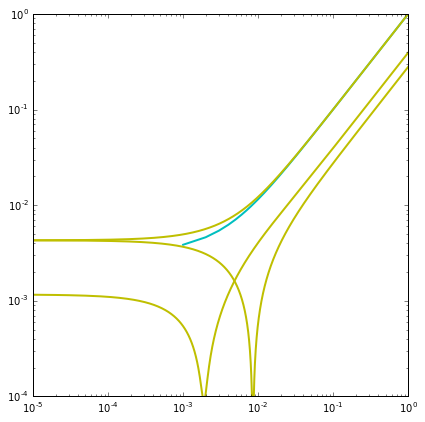

In [49]:
plt.figure(figsize=(6,6))
plt.loglog(values,lowerNorm,color='c',linewidth=2)

#normal heirarcy
plt.loglog(vals,MbetabetaNormup(vals,np.pi,np.pi),color='y',linewidth=2)
plt.loglog(vals,MbetabetaNormup(vals,np.pi/2,np.pi/2),color='y',linewidth=2)
plt.loglog(vals,MbetabetaNormup(vals,2*np.pi/5,np.pi),color='y',linewidth=2)

plt.xlim(1e-5,1)
plt.ylim(1e-4,1)
plt.tight_layout()
plt.show()

In [270]:
N1 = C12*C13+C23*S12+S13+2*C12*C23*S12*S13*S23+C13*S23+C12*S13*S23
N1up = C12up*C13up+C23up*S12up+S13up+2*C12up*C23up*S12up*S13up*S23up+C13up*S23up+C12up*S13up*S23up
N1dn = C12dn*C13dn+C23dn*S12dn+S13dn+2*C12dn*C23dn*S12dn*S13dn*S23dn+C13dn*S23dn+C12dn*S13dn*S23dn

N2 = C12*C23+C13*S12+2*C12*C23*S12*S13*S23+S12*S13*S23
N2up = C12up*C23up+C13up*S12up+2*C12up*C23up*S12up*S13up*S23up+S12up*S13up*S23up
N2dn = C12dn*C23dn+C13dn*S12dn+2*C12dn*C23dn*S12dn*S13dn*S23dn+S12dn*S13dn*S23dn

N3 = S13+C13*S23
N3up = S13up+C13up*S23up
N3dn = S13dn+C13dn*S23dn

I1 = C12*C13+C23*S12+2*C12*C23*S12*S13*S23+C12*S13*S23
I1up = C12up*C13up+C23up*S12up+2*C12up*C23up*S12up*S13up*S23up+C12up*S13up*S23up
I1dn = C12dn*C13dn+C23dn*S12dn+2*C12dn*C23dn*S12dn*S13dn*S23dn+C12dn*S13dn*S23dn

I2 = C12*C23+C13*S12+S13+2*C12*C23*S12*S13*S23+C13*S23+S12*S13*S23
I2up = C12up*C23up+C13up*S12up+S13up+2*C12up*C23up*S12up*S13up*S23up+C13up*S23up+S12up*S13up*S23up
I2dn = C12dn*C23dn+C13dn*S12dn+S13dn+2*C12dn*C23dn*S12dn*S13dn*S23dn+C13dn*S23dn+S12dn*S13dn*S23dn

I3 = S13+C13*S23
I3up = S13up+C13up*S23up
I3dn = S13dn+C13dn*S23dn

In [268]:
print('N1 =',N1)
print('N2 =',N2)
print('N3 =',N3)
print('I1 =',I1)
print('I2 =',I2)
print('I3 =',I3)

N1 = 1.3198668953
N2 = 0.684735772749
N3 = 0.463254410223
I1 = 0.856612485079
I2 = 1.14799018297
I3 = 0.463254410223


In [388]:
def measureNorm(m2,mslash):
    return ((mslash-N2*m2**2-N3*Dm31)/(N1))**(1/2)
def measureNormup(m2,mslash):
    return ((mslash-N2up*m2**2-N3up*Dm31up)/(N1up))**(1/2)
def measureNormdn(m2,mslash):
    return ((mslash-N2dn*m2**2-N3dn*Dm31dn)/(N1dn))**(1/2)


def measureInv(m2,mslash):
    return ((mslash-I2*m2**2-I3*Dm32)/(I1))**(1/2)
def measureInvup(m2,mslash):
    return ((mslash-I2up*m2**2-I3up*Dm32up)/(I1up))**(1/2)
def measureInvdn(m2,mslash):
    return ((mslash-I2dn*m2**2-I3dn*Dm32dn)/(I1dn))**(1/2)

def standard(m2):
    return (Dm21+m2**2)**(1/2)
def standardup(m2):
    return (Dm21up+m2**2)**(1/2)
def standarddn(m2):
    return (Dm21dn+m2**2)**(1/2)

In [502]:
vals = np.arange(0,1,1e-6)

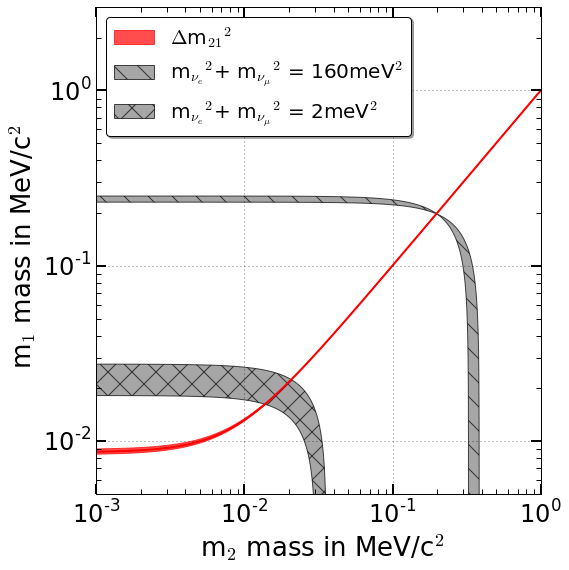

In [503]:
plt.figure(figsize=(8,8))


plt.fill_between(vals, standardup(vals), standarddn(vals),color='r',alpha=0.7,label=r'$\Delta$m${_{21}}^2$')

plt.loglog(vals,standard(vals),linewidth=2,color='r')

aa = measureNormup(vals,.08)
aa[np.isnan(aa)]=0.001
plt.fill_between(vals, aa, measureNormdn(vals,.08),color='grey',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 160meV$^2$',hatch="\\",edgecolor="k")
#plt.fill_between(vals, measureInvup(vals,.16), measureInvdn(vals,.16),color='steelblue',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 160meV$^2$',hatch="\\",edgecolor="k")

aa = measureNormdn(vals,.002)
aa[np.isnan(aa)]=0.0002
plt.fill_between(vals, measureNormup(vals,.002), aa,color='grey',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$',hatch="X",edgecolor="k")
#aa = measureInvdn(vals,.002)
#aa[np.isnan(aa)]=0.0004
#plt.fill_between(vals, measureInvup(vals,.002), aa,color='steelblue',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$',hatch="X",edgecolor="k")

plt.legend(loc='upper left',fontsize=20,shadow=True, fancybox=True)
#plt.text(1.2e-3, 1.3e-1, r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$', fontsize=26)
plt.xlabel(r' m$_2$ mass in MeV/c$^2$',fontsize=26)
plt.ylabel(r' m$_1$ mass in MeV/c$^2$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(5e-3,3)
plt.xlim(1e-3,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

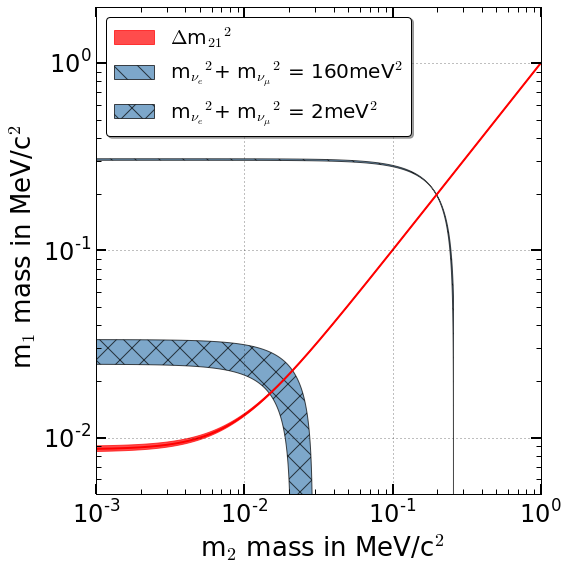

In [505]:
plt.figure(figsize=(8,8))


plt.fill_between(vals, standardup(vals), standarddn(vals),color='r',alpha=0.7,label=r'$\Delta$m${_{21}}^2$')

plt.loglog(vals,standard(vals),linewidth=2,color='r')

#aa = measureNormup(vals,.08)
#aa[np.isnan(aa)]=0.001
#plt.fill_between(vals, aa, measureNormdn(vals,.08),color='grey',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 160meV$^2$',hatch="\\",edgecolor="k")
plt.fill_between(vals, measureInvup(vals,.08), measureInvdn(vals,.08),color='steelblue',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 160meV$^2$',hatch="\\",edgecolor="k")

#aa = measureNormdn(vals,.002)
#aa[np.isnan(aa)]=0.0002
#plt.fill_between(vals, measureNormup(vals,.002), aa,color='grey',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$',hatch="X",edgecolor="k")
aa = measureInvdn(vals,.002)
aa[np.isnan(aa)]=0.0004
plt.fill_between(vals, measureInvup(vals,.002), aa,color='steelblue',alpha=0.7,label=r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$',hatch="X",edgecolor="k")

plt.legend(loc='upper left',fontsize=20,shadow=True, fancybox=True)
#plt.text(1.2e-3, 1.3e-1, r'm${_{\nu_e}}^2$+ m${_{\nu_\mu}}^2$ = 2meV$^2$', fontsize=26)
plt.xlabel(r' m$_2$ mass in MeV/c$^2$',fontsize=26)
plt.ylabel(r' m$_1$ mass in MeV/c$^2$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(5e-3,2)
plt.xlim(1e-3,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

In [316]:
measureInvdn(vals,.002)

array([ 0.02468084,  0.02468083,  0.02468082, ...,         nan,
               nan,         nan])

In [339]:
np.nan_to_num(measureNormup(vals,.16))

array([ 0.35502384,  0.35502384,  0.35502383, ...,  0.        ,
        0.        ,  0.        ])

In [380]:
aa = measureInvdn(vals,.002)
aa

array([ 0.02465178,  0.02465172,  0.02465166, ...,         nan,
               nan,         nan])

In [381]:
np.argwhere(np.isnan(aa))

array([[ 19615],
       [ 19616],
       [ 19617],
       ..., 
       [998997],
       [998998],
       [998999]])

In [382]:
aa[19610:19618]

array([ 0.00054148,  0.00048385,  0.00041836, ...,         nan,
               nan,         nan])

In [341]:
train = np.array([2, 4, 4, 8, 32, np.NaN, 12, np.NaN]) 
train[np.isnan(train)]=3
train

array([  2.,   4.,   4.,   8.,  32.,   3.,  12.,   3.])

In [348]:
aa[np.isnan(aa)]=3
aa

array([ 0.35502384,  0.35502384,  0.35502383, ...,  3.        ,
        3.        ,  3.        ])

In [356]:
len(aa)

999000